In [88]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [89]:
import os
wd = os.getcwd()
wd

'C:\\Users\\Nils\\Documents\\KIT-TVWL\\Master\\SS 18\\KD Seminar\\Git\\mlp'

**Read in financial Data**

In [90]:
fin_data = pd.read_csv("../finance_data/data/aggregated_returns.csv", index_col=["Timestamp"], parse_dates=True)
fin_data = fin_data.drop(columns=["Unnamed: 0"])
fin_data = fin_data.sort_index()
fin_data.head()

,Samsung,Telefonica,Allianz,Total,Bayer,Tesla,Airbus,Apple,BASF,BMW,Google
Timestamp,,,,,,,,,,,
2010-06-29,0.022990,-0.031939,-0.005759,0.002937,-0.005449,0.002515,0.002350,0.018279,0.003982,-0.004127,0.026947
2010-06-30,0.010390,-0.023302,0.021987,-0.013874,0.009283,0.081723,0.051293,0.012200,0.027190,0.047668,0.019717
2010-07-01,-0.001305,-0.010501,-0.004610,0.011670,0.026683,0.134312,0.018751,0.006217,0.001368,0.008280,0.034667
2010-07-02,0.000000,0.009063,0.009995,-0.005852,0.001240,0.175470,-0.012851,-0.006820,0.011355,-0.005921,0.010506
2010-07-06,0.007772,-0.018515,-0.007211,-0.035820,-0.006629,0.019430,-0.023836,-0.039568,0.001796,-0.019048,0.002878


In [91]:
fin_data.shift(-1)[0:4]

,Samsung,Telefonica,Allianz,Total,Bayer,Tesla,Airbus,Apple,BASF,BMW,Google
Timestamp,,,,,,,,,,,
2010-06-29,0.010390,-0.023302,0.021987,-0.013874,0.009283,0.081723,0.051293,0.012200,0.027190,0.047668,0.019717
2010-06-30,-0.001305,-0.010501,-0.004610,0.011670,0.026683,0.134312,0.018751,0.006217,0.001368,0.008280,0.034667
2010-07-01,0.000000,0.009063,0.009995,-0.005852,0.001240,0.175470,-0.012851,-0.006820,0.011355,-0.005921,0.010506
2010-07-02,0.007772,-0.018515,-0.007211,-0.035820,-0.006629,0.019430,-0.023836,-0.039568,0.001796,-0.019048,0.002878


In [92]:
fin_data_class = fin_data.applymap(lambda x: 0 if x < 0 else 1)
fin_data_class = fin_data_class.shift(-1)

In [93]:
fin_data_class.head()

,Samsung,Telefonica,Allianz,Total,Bayer,Tesla,Airbus,Apple,BASF,BMW,Google
Timestamp,,,,,,,,,,,
2010-06-29,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2010-06-30,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2010-07-01,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
2010-07-02,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2010-07-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [94]:
val_count = {0: 0, 1: 0}
for idx, row in fin_data_class.iterrows():
    tmp = row.value_counts()
    if 0 in tmp:
        val_count[0] = val_count[0]  + tmp[0]
    if 1 in tmp:
        val_count[1] = val_count[1]  + tmp[1]
val_count["0_relative"] = round((val_count[0] / (val_count[0] + val_count[1])) * 100, 2) 
val_count["1_relative"] = round((val_count[1] / (val_count[0] + val_count[1])) * 100, 2) 
val_count

{0: 10520,
 1: 10259,
 '0_relative': 50.630000000000003,
 '1_relative': 49.369999999999997}

**Read in training Data**

In [95]:
path_to_data = "../doc2vec/data/article_vectors_2015-11-25-2018-06-18.json"

In [96]:
data = pd.read_json(path_to_data)

In [97]:
data = data.applymap(lambda x: np.array(x))

In [98]:
data.head(2)

,Samsung,BASF,Apple,Tesla,Airbus,Bayer,BMW,Telefonica,Google,Allianz,Total
2015-11-25,"[[-0.09097237885, -0.512056529522, 0.448597371...","[[-0.224870830774, -3.794226408, -1.9525440931...","[[-2.04224681854, -1.60448515415, 0.2704625129...","[[-2.1069715023, -1.426415205, 1.64306604862, ...","[[2.23846936226, 3.11426877975, 0.093617297709...","[[1.51722872257, 2.5938539505, -0.247232601047...","[[0.157938063145, 0.579978168011, 0.4118370115...","[[0.473003387451, 2.60217881203, -0.5277323126...","[[-0.520612180233, -0.675680935383, -0.3074057...","[[0.0183677487075, 1.12623000145, -0.909998118...","[[-2.72483801842, 0.991170525551, -2.009325027..."
2015-11-26,"[[3.81038761139, 0.261076569557, 0.50902235508...","[[-1.22998988628, 0.361293852329, -0.980951845...","[[-0.65575748682, -0.652606129646, -1.20090234...","[[2.21736645699, -0.283544570208, 0.7639598250...","[[1.23432075977, 0.239986360073, -0.5406541228...","[[0.239219143987, -1.13649022579, -0.161926895...","[[-1.17502439022, 0.608320355415, 0.2831627428...","[[0.459036916494, 2.74760985374, -0.9232062101...","[[-0.319721221924, -0.454306691885, -1.1206489...","[[-2.44475650787, 1.04553902149, -0.1332414597...","[[0.563275456429, -2.01511955261, 1.2207951545..."


In [99]:
fin_data_dates = fin_data.index.date.tolist()
data_dates = data.index.date.tolist()

In [100]:
available_dates = list(set(fin_data_dates).intersection(data_dates))

fin_data_class = fin_data_class[fin_data_class.index.isin(available_dates)]
fin_data_train = fin_data[fin_data.index.isin(available_dates)]
data = data[data.index.isin(available_dates)]

In [101]:
val_count = {0: 0, 1: 0}
for idx, row in fin_data_class.iterrows():
    tmp = row.value_counts()
    if 0 in tmp:
        val_count[0] = val_count[0]  + tmp[0]
    if 1 in tmp:
        val_count[1] = val_count[1]  + tmp[1]
val_count["0_relative"] = round((val_count[0] / (val_count[0] + val_count[1])) * 100, 2) 
val_count["1_relative"] = round((val_count[1] / (val_count[0] + val_count[1])) * 100, 2) 
val_count

{0: 3313,
 1: 3188,
 '0_relative': 50.960000000000001,
 '1_relative': 49.039999999999999}

In [102]:
len(available_dates)

591

In [103]:
fin_data_train_vals = fin_data_train.values#.reshape(fin_data_train.shape[0], 1, fin_data_train.shape[1])
fin_data_train_vals.shape

(591, 11)

In [104]:
data.shape

(591, 11)

In [105]:
X = []

In [106]:
for idx, row in data.iterrows():
    #print(idx.date())
    tmp = data.loc[idx].values

    tmp_data = []
    for i,r in enumerate(tmp):
        #print(type(r))
        #print(type(r))
        if hasattr(r, 'shape') and r.shape[0] :
            #print(type(r))
            #print("HEY")
            r = np.array(r)
            #if r.shape[0] != 50:
            #    print(r.shape)
            p = 50-r.shape[0]
            r = np.pad(r, ((0,p),(0,0)), "constant")
            #print(r)
        else:
            r = np.zeros((50,100))
        tmp_data.append(r)
    tmp_data = np.array(tmp_data)
    tmp_data = tmp_data.reshape((50,100,11))
    #print(tmp_data)
    X.append(tmp_data)
    #data_dict[idx.date()] = tmp
    

In [107]:
#X = np.array(final_d)
X = np.array(X)
X.shape

(591, 50, 100, 11)

In [108]:
X[30][0][0]

array([ 2.0892725 ,  0.97919261,  0.14960267,  2.48351407,  1.98693359,
       -1.00085127, -0.74369341,  0.18027529,  0.73361021, -2.4204545 ,
        1.3043679 ])

In [109]:
X_flipped = np.flipud(X)
X_flipped.shape

(591, 50, 100, 11)

In [110]:
X_augmented = np.concatenate((X, X_flipped))
X_augmented.shape

(1182, 50, 100, 11)

In [111]:
Y = fin_data_class.values
Y_augmented = np.concatenate((Y, Y.copy()))
Y_augmented.shape

(1182, 11)

In [115]:
fin_data_train_vals_augmented = np.concatenate((fin_data_train_vals, fin_data_train.copy()))
fin_data_train_vals_augmented.shape

(1182, 11)

**CNN**

In [125]:
from sklearn.model_selection import train_test_split

from keras import backend as K
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, GaussianNoise, GaussianDropout
from keras.layers import Conv1D, Conv2D, MaxPooling2D, AveragePooling2D, GlobalMaxPooling2D, GlobalMaxPooling3D

from keras.initializers import RandomNormal

from keras import regularizers

from collections import Counter

In [126]:
def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))


In [116]:
x_train, x_val, x_ret_train, x_ret_val, y_train, y_val = train_test_split(X, fin_data_train_vals, Y, 
                                                  test_size=0.4, random_state=58)

x_train_aug, x_val_aug, x_ret_train_aug, x_ret_val_aug, y_train_aug, y_val_aug = train_test_split(X_augmented, fin_data_train_vals_augmented, Y_augmented, test_size=0.4, random_state=58)

In [127]:
val_count = {0: 0, 1: 0}

for y in y_train:
    tmp = Counter(y)
    #print(tmp)
    if 0 in tmp:
        val_count[0] = val_count[0]  + tmp[0]
    if 1 in tmp:
        val_count[1] = val_count[1]  + tmp[1]
val_count["0_relative"] = round((val_count[0] / (val_count[0] + val_count[1])) * 100, 2) 
val_count["1_relative"] = round((val_count[1] / (val_count[0] + val_count[1])) * 100, 2) 
val_count

{0: 1957, 1: 1937, '0_relative': 50.26, '1_relative': 49.74}

In [128]:
x_train.shape

(354, 50, 100, 11)

In [129]:
num_classes=11
num_filters= 100
filter_sizes = [3,4,5]
embedding_dim = x_train.shape[2]
sequence_length = x_train.shape[1] 

In [130]:
sequence_length

50

In [131]:
def custom_tanh(x):
    return (K.tanh((2/3)*x) * 1.5)#1.7159) #(2/3)

def custom_sigmoid(x):
    return (K.sigmoid((3/4) * x) )#* 1.7159)

In [178]:
def make_first_model():
    model = Sequential()
    model.add(GaussianNoise(stddev=1,input_shape=x_train.shape[1:]))
    model.add(Conv2D(num_filters, kernel_size=(filter_sizes[0], embedding_dim), padding='valid',input_shape=x_train.shape[1:], 
                     data_format="channels_last", activation="relu", kernel_regularizer=regularizers.l1(0.01),
                     kernel_initializer=RandomNormal())) #relu
    #, kernel_regularizer=regularizers.l2(0.01)
    #model.add(Conv2D(num_filters, kernel_size=(filter_sizes[1], embedding_dim), padding='same', activation="relu"))

    model.add(BatchNormalization(axis=3))
    model.add(GaussianDropout(0.4))
    model.add(MaxPooling2D(pool_size=(sequence_length - filter_sizes[0] + 1, 1), strides=(1,1))) #data_format="channels_last"
    #model.add(AveragePooling2D(pool_size=(sequence_length - filter_sizes[0] + 1, 1), strides=(1,1))) 
    #model.add(GlobalMaxPooling3D(data_format="channels_last"))
    model.add(BatchNormalization(axis=3))
    #model.add(Conv2D(num_filters, kernel_size=(1,embedding_dim), strides=(1,1), activation="relu"))
    #model.add(MaxPooling2D(pool_size=(sequence_length - filter_sizes[1] + 1, 1), strides=(1,1)))
    #model.add(Activation('relu'))
    #model.add(BatchNormalization())
    model.add(Dropout(0.5))
    #model.add(GaussianNoise(stddev=3))

    #model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation="relu")) #custom_tanh "relu" custom_tanh
    #model.add(Activation('relu'))
    model.add(GaussianDropout(0.5))
    #model.add(Dense(512, activation="relu"))
    #model.add(Dense(512, activation="relu"))
    model.add(Dense(num_classes, activation="sigmoid")) #"sigmoid"  custom_sigmoid 
    
    adam_opt = keras.optimizers.adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=0.0)

    model.compile(loss='binary_crossentropy', 
              optimizer=adam_opt,#opt,"Adam"
              metrics=['binary_accuracy', f1, precision, recall]) #'binary_accuracy',
    
    return model

In [179]:
first_model = make_first_model()
first_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gaussian_noise_14 (GaussianN (None, 50, 100, 11)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 48, 1, 100)        330100    
_________________________________________________________________
batch_normalization_25 (Batc (None, 48, 1, 100)        400       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 1, 100)         0         
_________________________________________________________________
batch_normalization_26 (Batc (None, 1, 1, 100)         400       
_________________________________________________________________
dropout_17 (Dropout)         (None, 1, 1, 100)         0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 100)               0         
__________

In [180]:
history = first_model.fit(x_train_aug, y_train_aug, validation_data = (x_val_aug, y_val_aug),
                          epochs=100, batch_size=10, verbose=2)

Train on 709 samples, validate on 473 samples
Epoch 1/100
 - 9s - loss: 19.5815 - binary_accuracy: 0.4988 - f1: 0.4947 - precision: 0.4833 - recall: 0.5181 - val_loss: 16.3693 - val_binary_accuracy: 0.5095 - val_f1: 0.5543 - val_precision: 0.5078 - val_recall: 0.6222
Epoch 2/100
 - 7s - loss: 14.0603 - binary_accuracy: 0.5024 - f1: 0.4887 - precision: 0.4858 - recall: 0.4995 - val_loss: 11.7837 - val_binary_accuracy: 0.5084 - val_f1: 0.5291 - val_precision: 0.5083 - val_recall: 0.5631
Epoch 3/100
 - 6s - loss: 10.0991 - binary_accuracy: 0.5221 - f1: 0.5061 - precision: 0.5094 - recall: 0.5157 - val_loss: 8.5766 - val_binary_accuracy: 0.5184 - val_f1: 0.5142 - val_precision: 0.5182 - val_recall: 0.5201
Epoch 4/100
 - 7s - loss: 7.4000 - binary_accuracy: 0.5401 - f1: 0.5156 - precision: 0.5240 - recall: 0.5157 - val_loss: 6.4196 - val_binary_accuracy: 0.5159 - val_f1: 0.5236 - val_precision: 0.5155 - val_recall: 0.5426
Epoch 5/100
 - 7s - loss: 5.6678 - binary_accuracy: 0.5379 - f1: 0.51

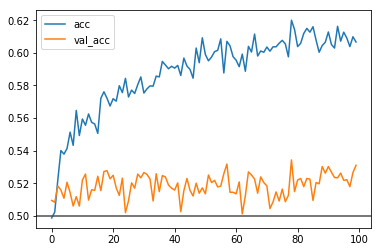

In [181]:
plt.plot(history.history["binary_accuracy"], label="acc")
plt.plot(history.history["val_binary_accuracy"], label="val_acc")
plt.axhline(0.5, c=".3")
plt.legend()
plt.show()

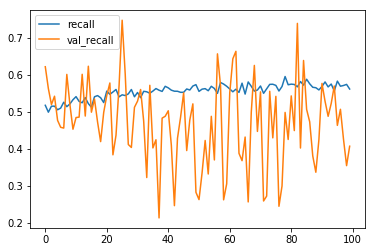

In [182]:
plt.plot(history.history["recall"], label="recall")
plt.plot(history.history["val_recall"], label="val_recall")

plt.legend()
plt.show()

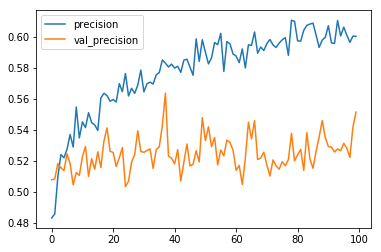

In [183]:
plt.plot(history.history["precision"], label="precision")
plt.plot(history.history["val_precision"], label="val_precision")

plt.legend()
plt.show()

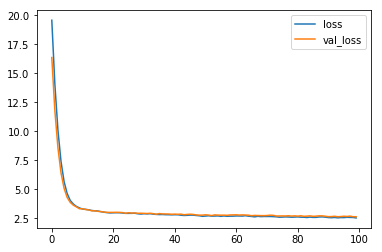

In [184]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

In [185]:
preds = first_model.predict(x_val)


In [222]:
df_y_val = pd.DataFrame(y_val_aug, columns=fin_data_class.columns)

In [187]:
df_predictions = pd.DataFrame(preds, columns=fin_data_class.columns) #, index = fin_data_class.index
df_predictions.head()

,Samsung,Telefonica,Allianz,Total,Bayer,Tesla,Airbus,Apple,BASF,BMW,Google
0,0.290587,0.375708,0.505901,0.316252,0.544603,0.547483,0.204973,0.562657,0.352659,0.558685,0.380507
1,0.326052,0.560312,0.756457,0.281274,0.787196,0.549181,0.537508,0.501461,0.842814,0.809584,0.508066
2,0.483306,0.717340,0.462325,0.380544,0.649359,0.712202,0.528795,0.546447,0.566184,0.778452,0.559138
3,0.110766,0.397452,0.273075,0.300529,0.466843,0.505922,0.124258,0.556985,0.248778,0.487630,0.278283
4,0.276534,0.364624,0.392929,0.323367,0.557227,0.539313,0.306563,0.416031,0.411901,0.421581,0.329475


In [227]:
def try_cuts_arr(df, cut_count):
    
    cuts = np.linspace(0,1,cut_count)
    accs = []
    fp = []
    fn = []
    
    
    for c in cuts:
        df_tmp = df.applymap(lambda x: 1 if x > c else 0)

        df_tmp = df_y_val.rsub(df_tmp)
        df_tmp["error_sum"] = df_tmp.apply(lambda x: np.sum(abs(x)), axis=1)
        
        total_returns = df_tmp.shape[0] * df_tmp.shape[1]
        error_sum = df_tmp["error_sum"].sum()
        accuracy = (total_returns - error_sum) / total_returns
        
        accs.append(accuracy)
        
        false_positive = np.sum(df_tmp.apply(count_fp, axis=1))
        false_negative = df_tmp.apply(count_fn, axis=1).sum()
        
        fp.append(false_positive)
        fn.append(false_negative)
        
    return accs, fp, fn, cuts

In [154]:
def try_cuts(df, cut_count, subset=None):
    
    cuts = np.linspace(0,1,cut_count)
    accs = []
    
    for c in cuts:
        df_tmp = df.applymap(lambda x: 1 if x > c else 0)
        if subset:
            df_tmp = fin_data_class[subset].rsub(df_tmp)
        else:
            df_tmp = fin_data_class.rsub(df_tmp)
        df_tmp["error_sum"] = df_tmp.apply(lambda x: np.sum(abs(x)), axis=1)
        
        total_returns = df_tmp.shape[0] * df_tmp.shape[1]
        error_sum = df_tmp["error_sum"].sum()
        accuracy = (total_returns - error_sum) / total_returns
        
        accs.append(accuracy)
    return accs, cuts

In [189]:
#accs, cuts = try_cuts(df_predictions, 30, subset=slice(300,-1)) #subset=slice(250, -1)
accs, fp, fn, cuts = try_cuts_arr(df_predictions, 30)

In [190]:
max_index = accs.index(max(accs))
cuts[max_index]

0.51724137931034486

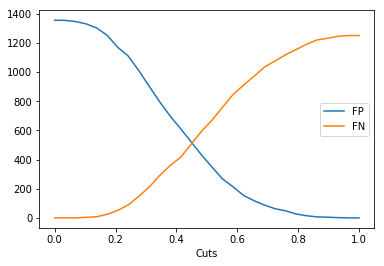

In [191]:
plt.plot(cuts, fp, label="FP")
plt.plot(cuts, fn, label="FN")
plt.xlabel("Cuts")
plt.legend()
plt.show()

Text(0,0.5,'Accuracy')

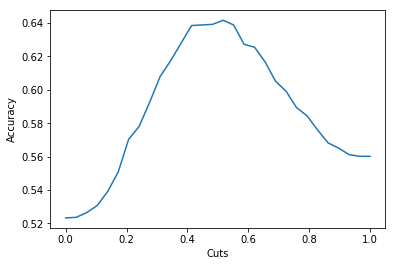

In [192]:
plt.plot(cuts, accs)
plt.xlabel("Cuts")
plt.ylabel("Accuracy")

In [193]:
df_predictions = df_predictions.applymap(lambda x: 1 if x > cuts[max_index] else 0) #cuts[max_index]
df_predictions.to_csv("./predictions/predictions_frst_model_non_training_data_with_data_augmentation.csv")
df_predictions.head()

,Samsung,Telefonica,Allianz,Total,Bayer,Tesla,Airbus,Apple,BASF,BMW,Google
0,0,0,0,0,1,1,0,1,0,1,0
1,0,1,1,0,1,1,1,0,1,1,0
2,0,1,0,0,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,1,1,0,0,0,0,0


In [194]:
fin_data_class.head()

,Samsung,Telefonica,Allianz,Total,Bayer,Tesla,Airbus,Apple,BASF,BMW,Google
Timestamp,,,,,,,,,,,
2015-11-25,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2015-11-27,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
2015-11-30,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
2015-12-01,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2015-12-02,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0


In [173]:
df_pred_errors = fin_data_class.rsub(df_predictions)

In [70]:
def count_fp(x):
    company_list = fin_data_class.columns
    tmp = x[company_list]
    
    if 1 in tmp.value_counts() or 1.0 in tmp.value_counts():

        return tmp.value_counts()[1]
        
    else:
        return 0
    
def count_fn(x):
    company_list = fin_data_class.columns
    tmp = x[company_list]
    
    if -1 in tmp.value_counts() or -1.0 in tmp.value_counts():

        return tmp.value_counts()[-1]
    
    else:
        return 0

In [256]:
df_pred_errors["error_sum"] = df_pred_errors.apply(lambda x: np.sum(abs(x)), axis=1)
df_pred_errors["fale_pos_sum"] = df_pred_errors.apply(count_fp, axis=1)
df_pred_errors["fale_neg_sum"] = df_pred_errors.apply(count_fn, axis=1)

In [257]:
df_pred_errors["fale_pos_sum"].sum()

923

In [258]:
df_pred_errors["fale_neg_sum"].sum()

613

In [195]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix
from sklearn.metrics import classification_report

In [196]:
print(classification_report(y_val.ravel(), df_predictions.values.ravel()))

             precision    recall  f1-score   support

        0.0       0.60      0.74      0.66      1356
        1.0       0.62      0.46      0.53      1251

avg / total       0.61      0.61      0.60      2607



In [85]:
precision, recall, thresholds = precision_recall_curve(y_val.ravel(), preds.ravel())

Text(0,0.5,'Precision')

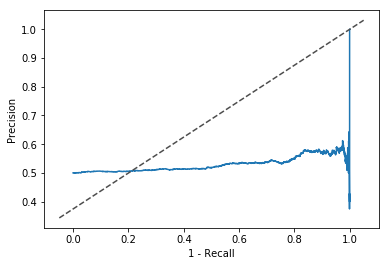

In [86]:
plt.plot((1 - recall), precision)
#plt.step((1-recall), thresholds.add(1))
plt.plot(plt.xlim(), plt.ylim(), ls="--", c=".3")
plt.xlabel("1 - Recall")
plt.ylabel("Precision")

In [198]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_val.ravel(), preds.ravel())

In [199]:
auc_keras = auc(fpr_keras, tpr_keras)

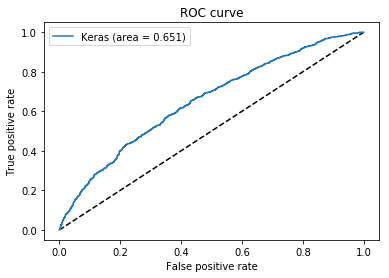

In [200]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [197]:
confusion_matrix(y_val.ravel(), df_predictions.values.ravel())

array([[1008,  348],
       [ 671,  580]], dtype=int64)

## Second Model

In [163]:
from keras.layers import Dense, Input, Flatten, Reshape, concatenate, Dropout, Concatenate, Activation
from keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Embedding, MaxPool2D, AvgPool2D
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard
from keras.models import Model
from keras import optimizers
from keras import regularizers

from keras.optimizers import Adam

In [201]:
def _bn_relu(input):
    """Helper to build a BN -> relu block
    """
    norm = BatchNormalization(axis=3)(input)
    return Activation("relu")(norm)

def _relu_bn(input):
    """Helper to build a relu -> BN block
    """
    act = Activation("relu")(input)
    return BatchNormalization(axis=3)(act)

In [226]:
inputs = Input(shape=x_train.shape[1:], dtype="float64", name="input_d2v")#, dtype='int32'[1:]

return_inputs = Input(shape=x_ret_train.shape[1:], name="input_rets")#, dtype="float64")

#reshape = Reshape((x_train[0],sequence_length,embedding_dim,11))(x_train)
dense_returns = Dense(50, activation=custom_tanh)(return_inputs)

conv_0 = Conv2D(num_filters, kernel_size=(filter_sizes[0], embedding_dim), padding='valid', 
                kernel_initializer='normal', kernel_regularizer=regularizers.l1(0.001))(inputs) #, activation='relu'
batch_norm_0 = _bn_relu(conv_0)
conv_1 = Conv2D(num_filters, kernel_size=(filter_sizes[1], embedding_dim), padding='valid', 
                kernel_initializer='normal', kernel_regularizer=regularizers.l1(0.001))(inputs) #, activation='relu'
batch_norm_1 = _bn_relu(conv_1)#atchNormalization()(conv_1)
conv_2 = Conv2D(num_filters, kernel_size=(filter_sizes[2], embedding_dim), padding='valid', 
                kernel_initializer='normal', kernel_regularizer=regularizers.l1(0.001))(inputs) #, activation='relu'
batch_norm_2 = _bn_relu(conv_2) #BatchNormalization()(conv_2)



maxpool_0 = MaxPool2D(pool_size=(sequence_length - filter_sizes[0] + 1, 1), 
                      strides=(1,1), padding='valid')(batch_norm_0)#(conv_0)
avgpool_0 = AvgPool2D(pool_size=(sequence_length - filter_sizes[0] + 1, 1), 
                      strides=(1,1), padding='valid')(batch_norm_0)#(conv_0)
dropout_0 = Dropout(0.5)(avgpool_0)
maxpool_1 = MaxPool2D(pool_size=(sequence_length - filter_sizes[1] + 1, 1), 
                      strides=(1,1), padding='valid')(batch_norm_1)#(conv_1)
avgpool_1 = AvgPool2D(pool_size=(sequence_length - filter_sizes[1] + 1, 1), 
                      strides=(1,1), padding='valid')(batch_norm_1)#(conv_0)
dropout_1 = Dropout(0.5)(maxpool_1)
maxpool_2 = MaxPool2D(pool_size=(sequence_length - filter_sizes[2] + 1, 1), 
                      strides=(1,1), padding='valid')(batch_norm_2)#(conv_2)
avgpool_2 = AvgPool2D(pool_size=(sequence_length - filter_sizes[2] + 1, 1), 
                      strides=(1,1), padding='valid')(batch_norm_2)#(conv_0)
dropout_2 = Dropout(0.5)(maxpool_2)

concatenated_tensor = concatenate([dropout_0, dropout_1, dropout_2]) #(axis=1) ([maxpool_0, maxpool_1, maxpool_2])
flatten = Flatten()(concatenated_tensor)
flatten_with_returns = concatenate([flatten, dense_returns])
#flatten_2 = Flatten()(flatten_with_returns)
hidden_layer = Dense(256, activation="relu")(flatten_with_returns) #flatten
dropout_3 = Dropout(0.5)(hidden_layer)
hidden_layer_2 = Dense(128, activation="relu")(dropout_3) #flatten
dropout_4 = Dropout(0.5)(hidden_layer_2)
output = Dense(num_classes, activation=custom_sigmoid)(dropout_4) #"softmax"

# this creates a model that includes
model = Model(inputs=[inputs, return_inputs], outputs=output)

checkpoint = ModelCheckpoint('weights.{epoch:03d}-{val_acc:.4f}.hdf5', monitor='val_acc', verbose=2, 
                             save_best_only=True, mode='auto')
tensorboard = TensorBoard(log_dir='./logs/run1', histogram_freq=1, write_graph=True, write_images=False)  

adam = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=0.0) #1e-8

model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy', f1, recall, precision])
print("Traning Model...")
model.summary()

Traning Model...
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_d2v (InputLayer)          (None, 50, 100, 11)  0                                            
__________________________________________________________________________________________________
conv2d_24 (Conv2D)              (None, 48, 1, 100)   330100      input_d2v[0][0]                  
__________________________________________________________________________________________________
conv2d_25 (Conv2D)              (None, 47, 1, 100)   440100      input_d2v[0][0]                  
__________________________________________________________________________________________________
conv2d_26 (Conv2D)              (None, 46, 1, 100)   550100      input_d2v[0][0]                  
____________________________________________________________________________________________

In [214]:
model_train_input = {"input_d2v": x_train_aug, "input_rets": x_ret_train_aug}
model_val_input = {"input_d2v": x_val_aug, "input_rets": x_ret_val_aug}

In [228]:
y_train_aug.shape

(709, 11)

In [229]:
model2 = model.fit(model_train_input, y_train_aug, batch_size=70, epochs=60, verbose=2, callbacks=[checkpoint], #tensorboard
                   validation_data=(model_val_input, y_val_aug)) # starts training

Train on 709 samples, validate on 473 samples
Epoch 1/60
Epoch 00001: val_acc improved from -inf to 0.51586, saving model to weights.001-0.5159.hdf5
 - 17s - loss: 53.4596 - acc: 0.5025 - f1: 0.4684 - recall: 0.4545 - precision: 0.4845 - val_loss: 52.4392 - val_acc: 0.5159 - val_f1: 0.4465 - val_recall: 0.3919 - val_precision: 0.5213
Epoch 2/60
Epoch 00002: val_acc improved from 0.51586 to 0.51797, saving model to weights.002-0.5180.hdf5
 - 14s - loss: 52.0671 - acc: 0.4906 - f1: 0.4689 - recall: 0.4661 - precision: 0.4732 - val_loss: 50.8920 - val_acc: 0.5180 - val_f1: 0.4728 - val_recall: 0.4338 - val_precision: 0.5215
Epoch 3/60
Epoch 00003: val_acc did not improve
 - 16s - loss: 50.7114 - acc: 0.4976 - f1: 0.4789 - recall: 0.4783 - precision: 0.4806 - val_loss: 49.6703 - val_acc: 0.5178 - val_f1: 0.5077 - val_recall: 0.4992 - val_precision: 0.5193
Epoch 4/60
Epoch 00004: val_acc improved from 0.51797 to 0.51835, saving model to weights.004-0.5184.hdf5
 - 14s - loss: 49.4857 - acc: 

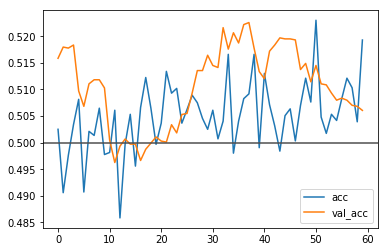

In [230]:
plt.plot(model2.history["acc"], label="acc")
plt.plot(model2.history["val_acc"], label="val_acc")
plt.axhline(0.5, c=".3")
plt.legend()
plt.show()

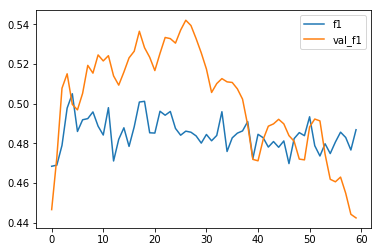

In [231]:
plt.plot(model2.history["f1"], label="f1")
plt.plot(model2.history["val_f1"], label="val_f1")

plt.legend()
plt.show()

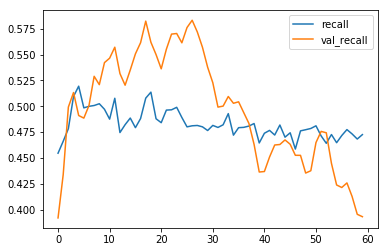

In [232]:
plt.plot(model2.history["recall"], label="recall")
plt.plot(model2.history["val_recall"], label="val_recall")

plt.legend()
plt.show()

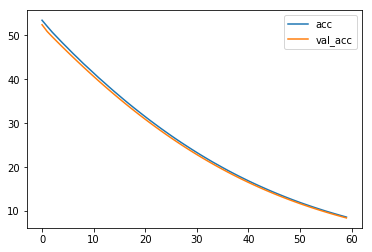

In [233]:
plt.plot(model2.history["loss"], label="acc")
plt.plot(model2.history["val_loss"], label="val_acc")
plt.legend()
plt.show()

In [249]:
preds2 = model.predict([x_val_aug, x_ret_val_aug])

In [250]:
df_predictions2 = pd.DataFrame(preds2, columns=fin_data_class.columns) #, index = fin_data_class.index
df_predictions2.head()

,Samsung,Telefonica,Allianz,Total,Bayer,Tesla,Airbus,Apple,BASF,BMW,Google
0,0.499153,0.489549,0.497798,0.481692,0.511770,0.501572,0.493330,0.511813,0.493999,0.513070,0.492708
1,0.500997,0.491209,0.499835,0.479882,0.512351,0.502680,0.490224,0.506019,0.494460,0.516879,0.493678
2,0.495791,0.494380,0.501281,0.484438,0.510725,0.493457,0.496287,0.505958,0.502795,0.521306,0.497906
3,0.498678,0.485854,0.497780,0.484815,0.505942,0.496441,0.497731,0.514902,0.489731,0.511239,0.488325
4,0.502425,0.495174,0.502368,0.480965,0.515200,0.499358,0.491625,0.509043,0.502991,0.520657,0.497405


In [251]:
#accs, cuts = try_cuts(df_predictions2, 50, subset=None) #, subset=slice(0,250)
accs, fp, fn, cuts = try_cuts_arr(df_predictions2, 60)
max_index = accs.index(max(accs))
print("Achieved Accuracy {}% with a cut at {}".format(round(max(accs)*100, 2), round(cuts[max_index], 2)))

Achieved Accuracy 55.18% with a cut at 0.51


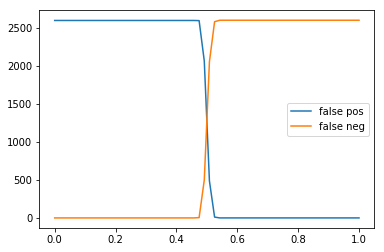

In [252]:
plt.plot(cuts, fp, label="false pos")
plt.plot(cuts, fn, label="false neg")
plt.legend()
plt.show()

Text(0,0.5,'Accuracy')

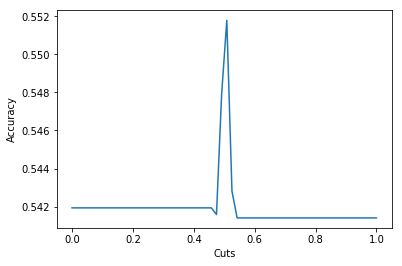

In [253]:
plt.plot(cuts, accs)
plt.xlabel("Cuts")
plt.ylabel("Accuracy")

In [254]:
df_predictions2 = df_predictions2.applymap(lambda x: 1 if x > cuts[max_index] else 0) # cuts[max_index]
df_predictions2.to_csv("./predictions/predictions_scnd_model_without_training_LOOKING_AT_PR.csv")
df_predictions2.tail()

,Samsung,Telefonica,Allianz,Total,Bayer,Tesla,Airbus,Apple,BASF,BMW,Google
468,0,0,0,0,1,0,0,1,0,1,0
469,0,0,0,0,1,0,0,1,0,1,0
470,0,0,0,0,1,0,0,0,0,1,0
471,0,0,0,0,0,0,0,1,0,1,0
472,0,0,0,0,1,0,0,1,0,1,0


In [255]:
fin_data_class.tail()

,Samsung,Telefonica,Allianz,Total,Bayer,Tesla,Airbus,Apple,BASF,BMW,Google
Timestamp,,,,,,,,,,,
2018-06-11,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
2018-06-12,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
2018-06-14,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2018-06-15,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2018-06-18,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [205]:
precision, recall, thresholds = precision_recall_curve(Y[300:].ravel(), preds.ravel())

Text(0,0.5,'Precision')

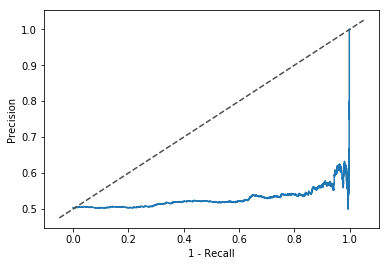

In [206]:
plt.plot((1 - recall), precision)
#plt.step((1-recall), thresholds.add(1))
plt.plot(plt.xlim(), plt.ylim(), ls="--", c=".3")
plt.xlabel("1 - Recall")
plt.ylabel("Precision")

In [256]:
print(classification_report(y_val_aug.ravel(), df_predictions2.values.ravel()))

             precision    recall  f1-score   support

        0.0       0.51      0.81      0.62      2600
        1.0       0.53      0.21      0.30      2603

avg / total       0.52      0.51      0.46      5203



In [257]:
confusion_matrix(y_val_aug.ravel(), df_predictions2.values.ravel())

array([[2113,  487],
       [2057,  546]], dtype=int64)